In [3]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [5]:
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)

In [8]:
def f(r,h,d_rho00):
     return np.sqrt(nf.bh_v(r_dat,load=True)**2 + nf.h_v(r,load=True)**2 + nf.b_v(r,load=True)**2 + nf.d_v(r,h,d_rho00,pref=False,load=True)**2)

In [9]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Disk
params.add('h', value=nf.h_c, min=0, max=1000)
params.add('d_rho00', value=nf.drho00_c, min=0)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

TypeError: d_Mdblintrho() takes from 0 to 2 positional arguments but 3 were given

In [7]:
#Define Stuff
l_dict = l_fit.best_values
#Black Hole
l_M = l_dict['M']
#Bulge
l_n = l_dict['n']
l_re = l_dict['re']
#Disk
l_h = l_dict['h']
l_d_rho00 = l_dict['d_rho00']
#Halo
l_rc = l_dict['rc']
l_h_rho00 = l_dict['h_rho00']

l_curve = f(r_dat,l_M,l_n,l_re,l_h,l_d_rho00,l_rc,l_h_rho00)

../python/NGC5533_functions.py:302: RuntimeWarning: overflow encountered in cosh
  return d_rho0(r, h, d_rho00)*np.power(np.cosh(z/z0(h)), -2)
../python/NGC5533_functions.py:328: RuntimeWarning: divide by zero encountered in double_scalars
  pref = epsdisk*(L0/d_Mdblintrho(r,h,d_rho00))
../python/NGC5533_functions.py:304: RuntimeWarning: overflow encountered in cosh
  return d_durho0(r, h, d_rho00)*np.power(np.cosh(z/z0(h)), -2)
../python/NGC5533_functions.py:329: RuntimeWarning: invalid value encountered in double_scalars
  val = 4*np.pi*G*d_outerintegral(r,h,d_rho00)*pref


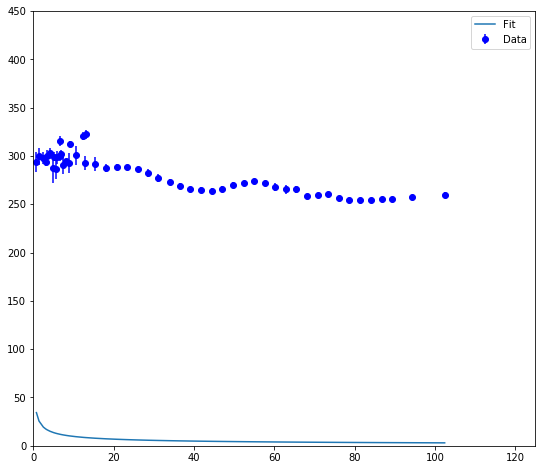

In [10]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)
plt.ylim(0,450)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')

plt.legend()
plt.savefig('Fitting_with_library.png')
plt.show()

l_fit